In [1]:
import h5py
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')

plt.rc('figure', autolayout=True)

tf.__version__

2022-07-04 00:28:35.065598: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-04 00:28:35.065663: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/home/piranha/.local/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


'2.8.0'

In [2]:
train_dataset = h5py.File('datasets/train_signs.h5', "r")
test_dataset = h5py.File('datasets/test_signs.h5', "r")

In [3]:
x_train = np.array(train_dataset['train_set_x'])
y_train = np.array(train_dataset['train_set_y'])
x_test = np.array(test_dataset['test_set_x'])
y_test = np.array(test_dataset['test_set_y'])

In [4]:
type(x_train)

numpy.ndarray

In [5]:
unique_labels = np.unique(y_train)

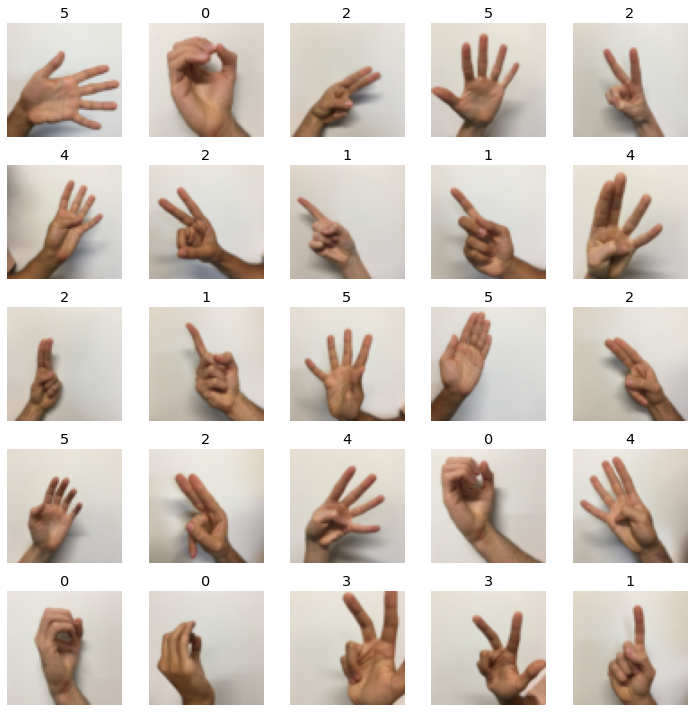

In [6]:

plt.figure(figsize=(10, 10))
for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(y_train[i])
    plt.axis("off")

In [7]:
x_train = x_train/255.0
x_test = x_test/255.0

In [8]:
# # GRADED FUNCTION: one_hot_matrix
# def one_hot_matrix(label, depth=6):
#     """
#     Computes the one hot encoding for a single label
#     Arguments:
#         label --  (int) Categorical labels
#         depth --  (int) Number of different classes that label can take 

#     Returns:
#          one_hot -- tf.Tensor A single-column matrix with the one hot encoding.
#     """
#     # (approx. 1 line)
#     # one_hot = ...
#     # YOUR CODE STARTS HERE
#     one_hot = tf.reshape(tf.one_hot(label,depth,axis=0),(depth,))
    
#     # YOUR CODE ENDS HERE
#     return one_hot

In [9]:
# new_y_test = y_test.map(one_hot_matrix)
# new_y_train = y_train.map(one_hot_matrix)

In [10]:
# print(next(iter(new_y_test)))

In [11]:

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(128, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)])


2022-07-04 00:28:42.685504: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-04 00:28:42.686238: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-04 00:28:42.686403: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-07-04 00:28:42.686453: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-07-04 00:28:42.686497: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [12]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics =['accuracy'])


In [13]:
x_train.shape

(1080, 64, 64, 3)

2022-07-04 00:28:42.948466: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 53084160 exceeds 10% of free system memory.


Epoch 1/100
34/34 [==============================] - 1s 25ms/step - loss: 2.6811 - accuracy: 0.1917 - val_loss: 1.6526 - val_accuracy: 0.2917
Epoch 2/100
34/34 [==============================] - 1s 21ms/step - loss: 1.7903 - accuracy: 0.2833 - val_loss: 1.7411 - val_accuracy: 0.3167
Epoch 3/100
34/34 [==============================] - 1s 21ms/step - loss: 1.5753 - accuracy: 0.3509 - val_loss: 1.4894 - val_accuracy: 0.4000
Epoch 4/100
34/34 [==============================] - 1s 19ms/step - loss: 1.5208 - accuracy: 0.3935 - val_loss: 1.8912 - val_accuracy: 0.2417
Epoch 5/100
34/34 [==============================] - 1s 22ms/step - loss: 1.5218 - accuracy: 0.4037 - val_loss: 1.3492 - val_accuracy: 0.5000
Epoch 6/100
34/34 [==============================] - 1s 23ms/step - loss: 1.2719 - accuracy: 0.5259 - val_loss: 1.3354 - val_accuracy: 0.5583
Epoch 7/100
34/34 [==============================] - 1s 25ms/step - loss: 1.2042 - accuracy: 0.5537 - val_loss: 1.2612 - val_accuracy: 0.5167
Epoch 

<AxesSubplot:title={'center':'Cross-entropy'}>

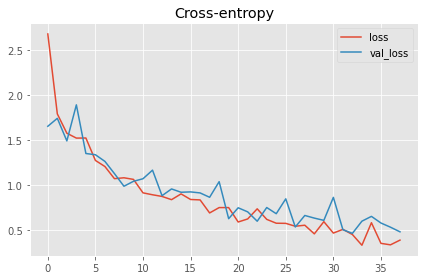

In [14]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=32,
    epochs=100,
    callbacks=[early_stopping]
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")

In [15]:
model.evaluate(x_test, y_test)


4/4 [==============================] - 0s 8ms/step - loss: 0.4592 - accuracy: 0.8667


[0.4592103660106659, 0.8666666746139526]

In [16]:
def evaluate_model(model, X_test, y_test):
    """
    evaluate model on test set and show results in dataframe.
    
    Parameters
    ----------
    model : keras model
        trained keras model.
    X_test : numpy array
        Features of holdout set.
    y_test : numpy array
        Labels of holdout set.
        
    Returns
    -------
    display_df : DataFrame
        Pandas dataframe containing evaluation results.
    """
    eval_dict = model.evaluate(X_test, y_test, return_dict=True)
    
    display_df = pd.DataFrame([eval_dict.values()], columns=[list(eval_dict.keys())])
    
    return display_df

In [17]:

# Evaluate model on test set and add results to dataframe
results = evaluate_model(model, x_test, y_test)

# Set index to 'Baseline'
results.index = ['Baseline']

# Display results
results.head()

4/4 [==============================] - 0s 8ms/step - loss: 0.4592 - accuracy: 0.8667


,loss,accuracy
Baseline,0.45921,0.866667


In [18]:
def build_model(hp):
    """
    Builds model and sets up hyperparameter space to search.
    
    Parameters
    ----------
    hp : HyperParameter object
        Configures hyperparameters to tune.
        
    Returns
    -------
    model : keras model
        Compiled model with hyperparameters to tune.
    """
    # Initialize sequential API and start building model.
    model = keras.Sequential()
    model.add(keras.layers.Flatten())
    
    # Tune the number of hidden layers and units in each.
    # Number of hidden layers: 1 - 5
    # Number of Units: 32 - 512 with stepsize of 32
    for i in range(1, hp.Int("num_layers", 2, 6)):
        model.add(
            keras.layers.Dense(
                units=hp.Int("units_" + str(i), min_value=32, max_value=512, step=32),
                activation="relu")
            )
        
        # Tune dropout layer with values from 0 - 0.3 with stepsize of 0.1.
        model.add(keras.layers.Dropout(hp.Float("dropout_" + str(i), 0, 0.3, step=0.1)))
    
    # Add output layer.
    model.add(keras.layers.Dense(units=10, activation="softmax"))
    
    # Tune learning rate for Adam optimizer with values from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])
    
    # Define optimizer, loss, and metrics
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss=keras.losses.SparseCategoricalCrossentropy(),
                  metrics=["accuracy"])
    
    return model

In [20]:
# Instantiate the tuner
import keras_tuner as kt
tuner = kt.Hyperband(build_model,
                     objective="val_accuracy",
                     max_epochs=20,
                     factor=3,
                     hyperband_iterations=10,
                     directory="kt_dir",
                     project_name="kt_hyperband",)

In [21]:
# Display search space summary
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 6, 'step': 1, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
dropout_1 (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.3, 'step': 0.1, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [22]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuner.search(x_train, y_train, epochs=100, validation_split=0.2, callbacks=[stop_early], verbose=2)

Trial 174 Complete [00h 00m 14s]
val_accuracy: 0.4027777910232544

Best val_accuracy So Far: 0.6388888955116272
Total elapsed time: 00h 26m 27s

Search: Running Trial #175

Value             |Best Value So Far |Hyperparameter
4                 |2                 |num_layers
512               |448               |units_1
0.2               |0.1               |dropout_1
0.0001            |0.0001            |learning_rate
480               |448               |units_2
0.3               |0                 |dropout_2
192               |224               |units_3
0.2               |0.3               |dropout_3
352               |416               |units_4
0.2               |0.2               |dropout_4
64                |32                |units_5
0.2               |0                 |dropout_5
20                |20                |tuner/epochs
7                 |7                 |tuner/initial_epoch
1                 |1                 |tuner/bracket
1                 |1                 |tune

KeyboardInterrupt: 